In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Data Analysis:

In [125]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [126]:
df.shape

(200, 5)

In [127]:
# Checked the number of rows and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [128]:
# Checked the column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [129]:
# Checked the data types of each column
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [130]:
# Checked for missing values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [131]:
# Checked for duplicate rows in the dataset
df.duplicated().sum()

0

In [132]:
# Checked for unique values in the 'Gender' column
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<Axes: >

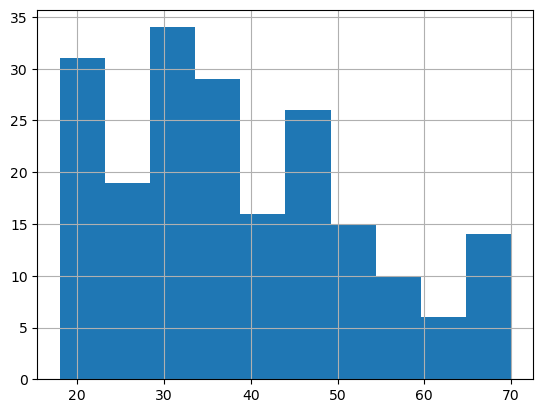

In [133]:
# Checked the distribution of the 'Age' column
df['Age'].hist()

<Axes: >

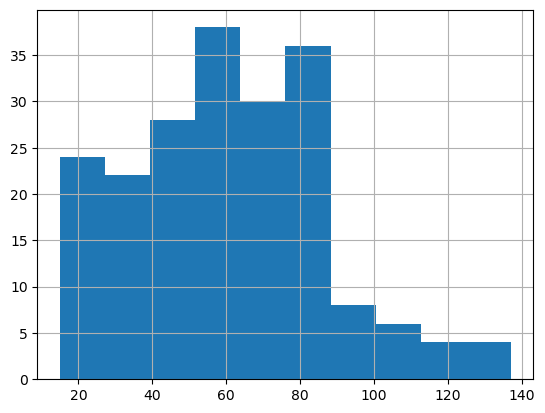

In [134]:
# Checked the distribution of the 'Annual Income (k$)' column
df['Annual Income (k$)'].hist()

<Axes: >

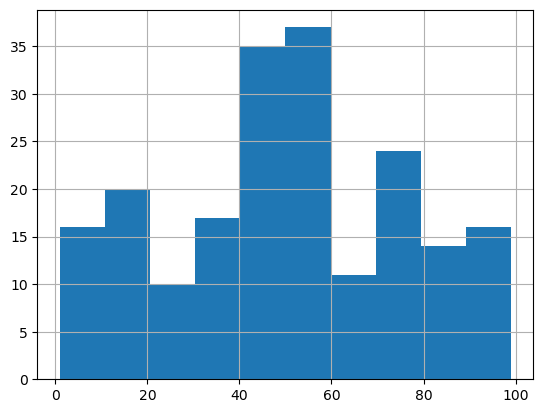

In [135]:
# Checked the distribution of the 'Spending Score (1-100)' column
df['Spending Score (1-100)'].hist()


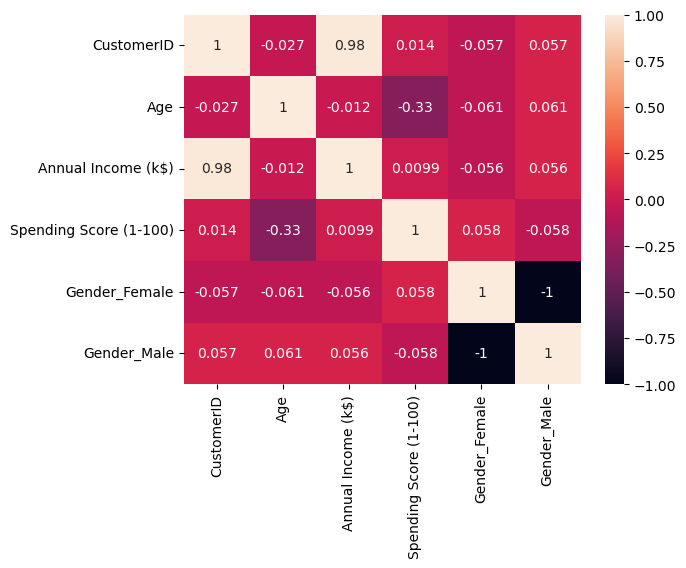

In [136]:
# Convert the 'Gender' column to numeric values using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'])

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

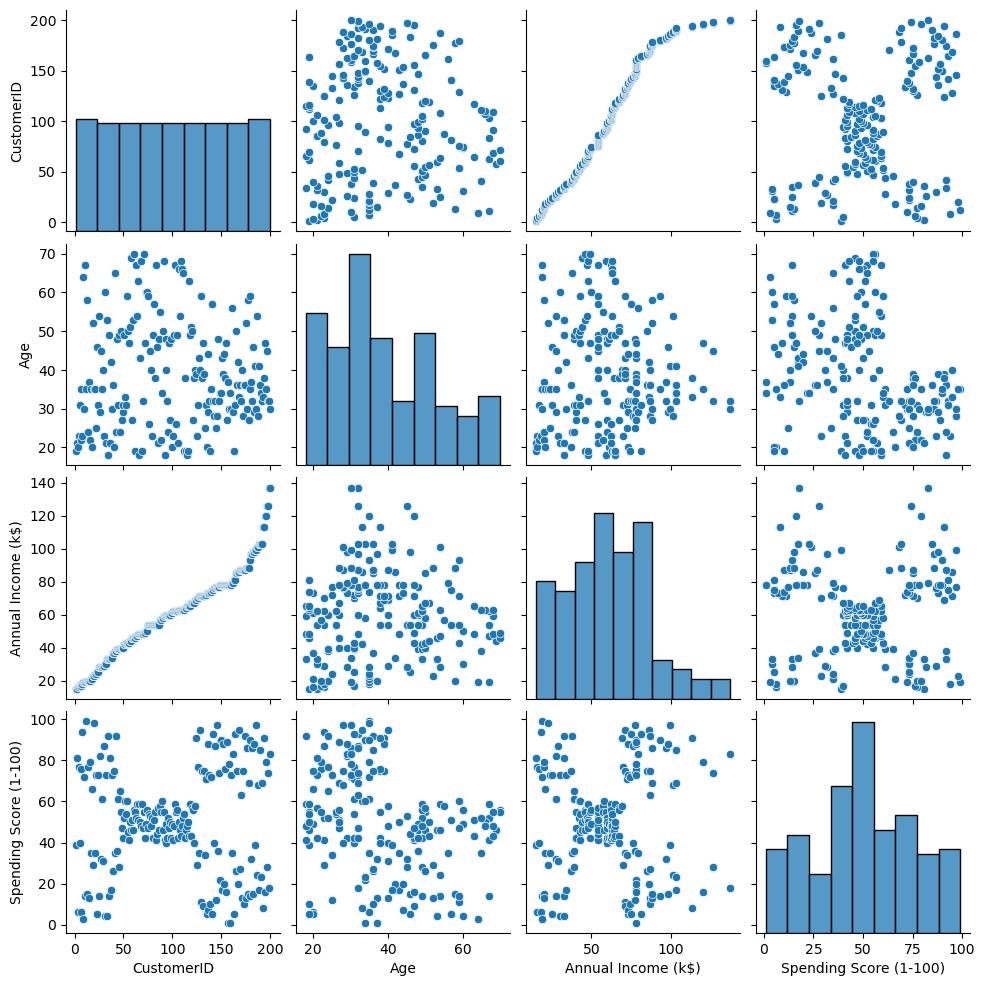

In [137]:

# Checked the pairplot
sns.pairplot(df)

## Data Cleaning:

• Identified and removed null/missing values 
• Detected and eliminated duplicate entries
• Dropped unnecessary columns
• Identified and managed outliers to ensure data qualit

In [138]:
# Identified and removed null/missing values
#df = df.dropna()
# Detected and eliminated duplicate entries
#df = df.drop_duplicates()
# Dropped unnecessary columns
#df = df.drop(['CustomerID'], axis=1)

#df = df[(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 200)]

## Data Visualization:


### Identified and removed null/missing values

In [139]:

df = df.dropna()
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###  Detected and eliminated duplicate entries

In [140]:

df = df.drop_duplicates()
df.sample(4)



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
38,39,Female,36,37,26
192,193,Male,33,113,8
144,145,Male,25,77,12
95,96,Male,24,60,52


###  Dropped unnecessary columns

In [141]:

df = df.drop(['CustomerID'], axis=1)
df.tail(4)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83


###  Identified and managed outliers to ensure data quality

In [142]:

df = df[(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 200)]
df.sample(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,Male,24,60,52
77,Male,40,54,48
86,Female,55,57,58
112,Female,38,64,42
130,Male,47,71,9
90,Female,68,59,55
190,Female,34,103,23
131,Male,39,71,75
71,Female,47,49,42
10,Male,67,19,14


In [143]:
df = df[(df['Spending Score (1-100)'] >= 0) & (df['Spending Score (1-100)'] <= 100)]
df.sample(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
114,Female,18,65,48
2,Female,20,16,6
41,Male,24,38,92
61,Male,19,46,55
177,Male,27,88,69
54,Female,50,43,45
176,Male,58,88,15
93,Female,40,60,40
26,Female,45,28,32


## Implemented the K-Means Clustering Algorithm for customer grouping

In [144]:

# Imported necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [145]:
data = pd.read_csv('Mall_Customers.csv')
data.drop(['CustomerID','Gender'],axis=1,inplace=True)
data.head(4)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77


In [146]:
# Scale the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
scaled_data = scaler.fit_transform(data)

# Print the scaled data
scaled_data




array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## Calculated WCSS (Within-Cluster Sum of Squares) values for K values ranging from 1 to 20

In [147]:
from sklearn.cluster import KMeans

In [148]:

k_values = range(1,21)  # Test 'k' from 1 to 20
wcss = []  # List to store the inertia values



In [149]:
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
wcss
    

c:\Users\anamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\anamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[600.0,
 389.3861889564371,
 297.0265446338418,
 205.22514747675922,
 189.31701867657824,
 133.9578383845476,
 121.45163841314084,
 110.12916980180651,
 105.39030692093945,
 84.24720730751838,
 81.74182120086894,
 70.4777463148645,
 66.93743797537613,
 69.24447129864542,
 61.87316581155309,
 55.38168825451423,
 53.78369263944135,
 53.140259602235986,
 47.47293205796019,
 47.94133682951133]

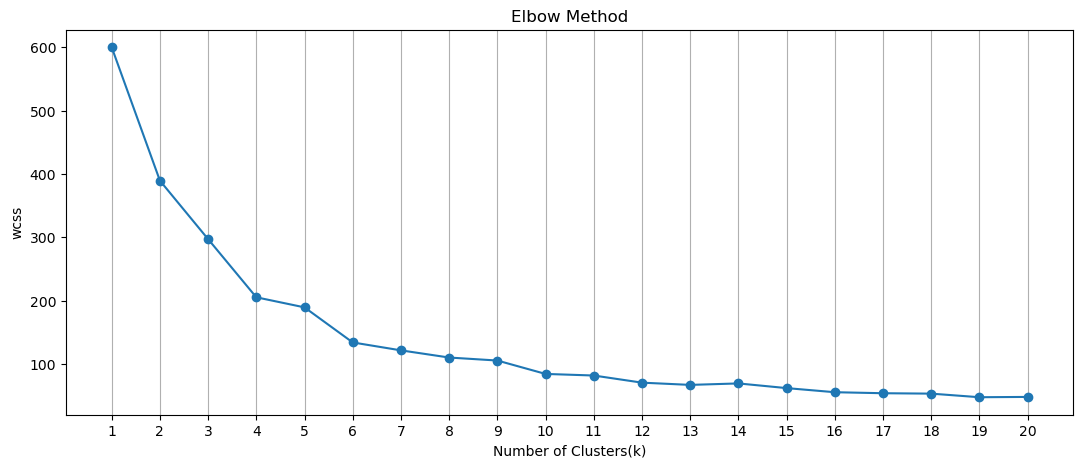

In [150]:
plt.figure(figsize=(13,5))
plt.plot(k_values,wcss, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.xticks(k_values)

plt.ylabel('wcss')
plt.title('Elbow Method')
plt.grid(axis='x')
plt.show()

In [151]:
# Identified clusters and their corresponding data points.
# Implemented the K-Means Clustering Algorithm for customer grouping

kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(scaled_data)
# Identified clusters and their corresponding data points.
kmeans.labels_


c:\Users\anamn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 1, 4, 4, 4, 1, 0, 4, 1, 0, 1, 1, 1, 0,
       4, 1, 0, 0, 1, 4, 1, 1, 1, 0, 4, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 0,
       0, 4, 1, 0, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 1, 0, 4, 0, 1, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 4, 4, 4, 0, 4, 4, 3, 2, 3, 4, 3, 1, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

### Data Visualization:


####  Created scatter plots to visualize clusters and their data points for clear insight

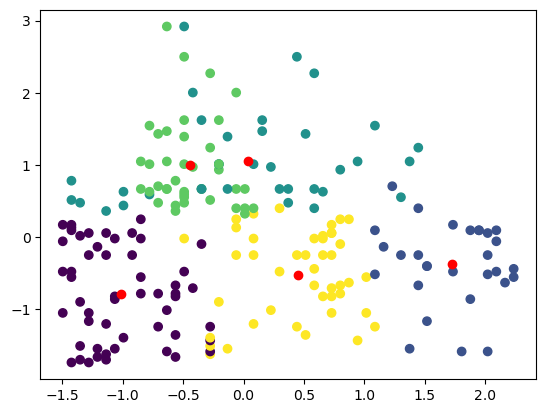

In [152]:
# Visualized the clusters using a scatter plot
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red')
plt.show()

In [153]:
# Calculated the silhouette score to evaluate the clustering performance
silhouette_score(scaled_data,kmeans.labels_)*100

36.138206623169445